In [2]:
import pandas as pd

### Dataset Description

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

TotalBsmtSF: Total square feet of basement area

BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

Fireplaces: Number of fireplaces

PoolArea: Pool area in square feet

GarageCars: Size of garage in car capacity

WoodDeckSF: Wood deck area in square feet

ScreenPorch: Screen porch area in square feet

## import Data

In [3]:
url = '/Users/sadiakhanrupa/Bootcamp Main Phase/Chapter_7 Supervised_ML/Data/housing_iteration_0_2_classification/housing_iteration_0_2_classification.csv'
data = pd.read_csv(url)
data.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
0,8450,65.0,856,3,0,0,2,0,0,0
1,9600,80.0,1262,3,1,0,2,298,0,0
2,11250,68.0,920,3,1,0,2,0,0,0
3,9550,60.0,756,3,1,0,3,0,0,0
4,14260,84.0,1145,4,1,0,3,192,0,0


## Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
 9   Expensive     1460 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 114.2 KB


In [5]:
data.isna().sum()

LotArea           0
LotFrontage     259
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
Expensive         0
dtype: int64

## define X and y

In [6]:
y = data.pop('Expensive')
y

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    1
1458    0
1459    0
Name: Expensive, Length: 1460, dtype: int64

In [7]:
X = data.copy()
X

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
0,8450,65.0,856,3,0,0,2,0,0
1,9600,80.0,1262,3,1,0,2,298,0
2,11250,68.0,920,3,1,0,2,0,0
3,9550,60.0,756,3,1,0,3,0,0
4,14260,84.0,1145,4,1,0,3,192,0
...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0
1456,13175,85.0,1542,3,2,0,2,349,0
1457,9042,66.0,1152,4,2,0,1,0,0
1458,9717,68.0,1078,2,0,0,1,366,0


## Data Splitting

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=.2, random_state=42)

In [9]:
X_train

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
254,8400,70.0,1314,3,0,0,1,250,0
1066,7837,59.0,799,3,1,0,2,0,0
638,8777,67.0,796,2,0,0,0,328,0
799,7200,60.0,731,3,2,0,1,0,0
380,5000,50.0,1026,3,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1095,9317,78.0,1314,3,1,0,2,0,0
1130,7804,65.0,1122,4,2,0,2,431,0
1294,8172,60.0,864,2,0,0,2,0,0
860,7642,55.0,912,3,1,0,1,0,0


In [10]:
X_test

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
892,8414,70.0,1059,3,0,0,1,192,0
1105,12256,98.0,1463,3,2,0,2,186,0
413,8960,56.0,1008,2,1,0,2,0,0
522,5000,50.0,1004,3,2,0,2,0,0
1036,12898,89.0,1620,2,1,0,3,228,0
...,...,...,...,...,...,...,...,...,...
479,5925,50.0,907,2,0,0,2,0,0
1361,16158,124.0,1530,3,1,0,2,168,0
802,8199,63.0,728,3,1,0,2,36,0
651,9084,60.0,755,4,1,0,1,120,0


## Implement a decision tree

![Decision tree Example](https://miro.medium.com/v2/resize:fit:1400/0*PB7MYQfzyaLaTp1n)
Example of a decision tree

>A Decision Tree is one of the simplest Machine Learning models. To implement it, we need to first:

- Import it from the appropriate submodule of Scikit-Learn.
- Initialize it.
- Fit it.

In [11]:
#import classifier
from sklearn.tree import DecisionTreeClassifier
my_tree = DecisionTreeClassifier()
my_tree.fit(X = X_train, y=y_train)

DecisionTreeClassifier()

## dealing with missing data
>We will use the `SimpleImputer()` with its default values. It will replace any missing value with the mean of the column it belongs to.

Simple imputer allows these strategies:
- mean (default),
- median,
- most frequent,
- constant.

For more details, look here: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [12]:
#217 missng values in train dataset
X_train.isna().sum() #LotFrontage   has  217 missing values

LotArea           0
LotFrontage     217
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
dtype: int64

In [13]:
#42 missing values in test dataset
X_test.isna().sum() #LotFrontage     42


LotArea          0
LotFrontage     42
TotalBsmtSF      0
BedroomAbvGr     0
Fireplaces       0
PoolArea         0
GarageCars       0
WoodDeckSF       0
ScreenPorch      0
dtype: int64

In [14]:
from sklearn.impute import SimpleImputer


> Follow this approach for different types of estimators:
1. initialize,
2. use fit on the **train** set,
3. use transform on the **train** set,
4. use transform on the **test** set.

It is possible to combine steps 2 and 3 and use fit_transform instead.

In [15]:
#initialize
my_imputer = SimpleImputer().set_output(transform='pandas')

In [16]:
my_imputer.fit(X_train)

SimpleImputer()

In [17]:
#use transform on the train dataset
X_train_imputed = my_imputer.transform(X_train)

In [18]:
X_train_imputed.isnull().sum()

LotArea         0
LotFrontage     0
TotalBsmtSF     0
BedroomAbvGr    0
Fireplaces      0
PoolArea        0
GarageCars      0
WoodDeckSF      0
ScreenPorch     0
dtype: int64

In [19]:
X_test_imputed = my_imputer.transform(X_test)

In [20]:
X_test_imputed.isnull().sum()

LotArea         0
LotFrontage     0
TotalBsmtSF     0
BedroomAbvGr    0
Fireplaces      0
PoolArea        0
GarageCars      0
WoodDeckSF      0
ScreenPorch     0
dtype: int64

## make predictions and check accuracy

In [21]:
y_train_pred = my_tree.predict(X_train_imputed)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.9332191780821918

# Check accuracy for test data set

In [25]:
y_test_pred = my_tree.predict(X_test_imputed)

In [26]:
accuracy_score(y_test, y_test_pred)

0.9006849315068494

the accuracy is quite similar

## plotting the Decision tree

In [30]:
import matplotlib as plt
from sklearn.tree import plot_tree

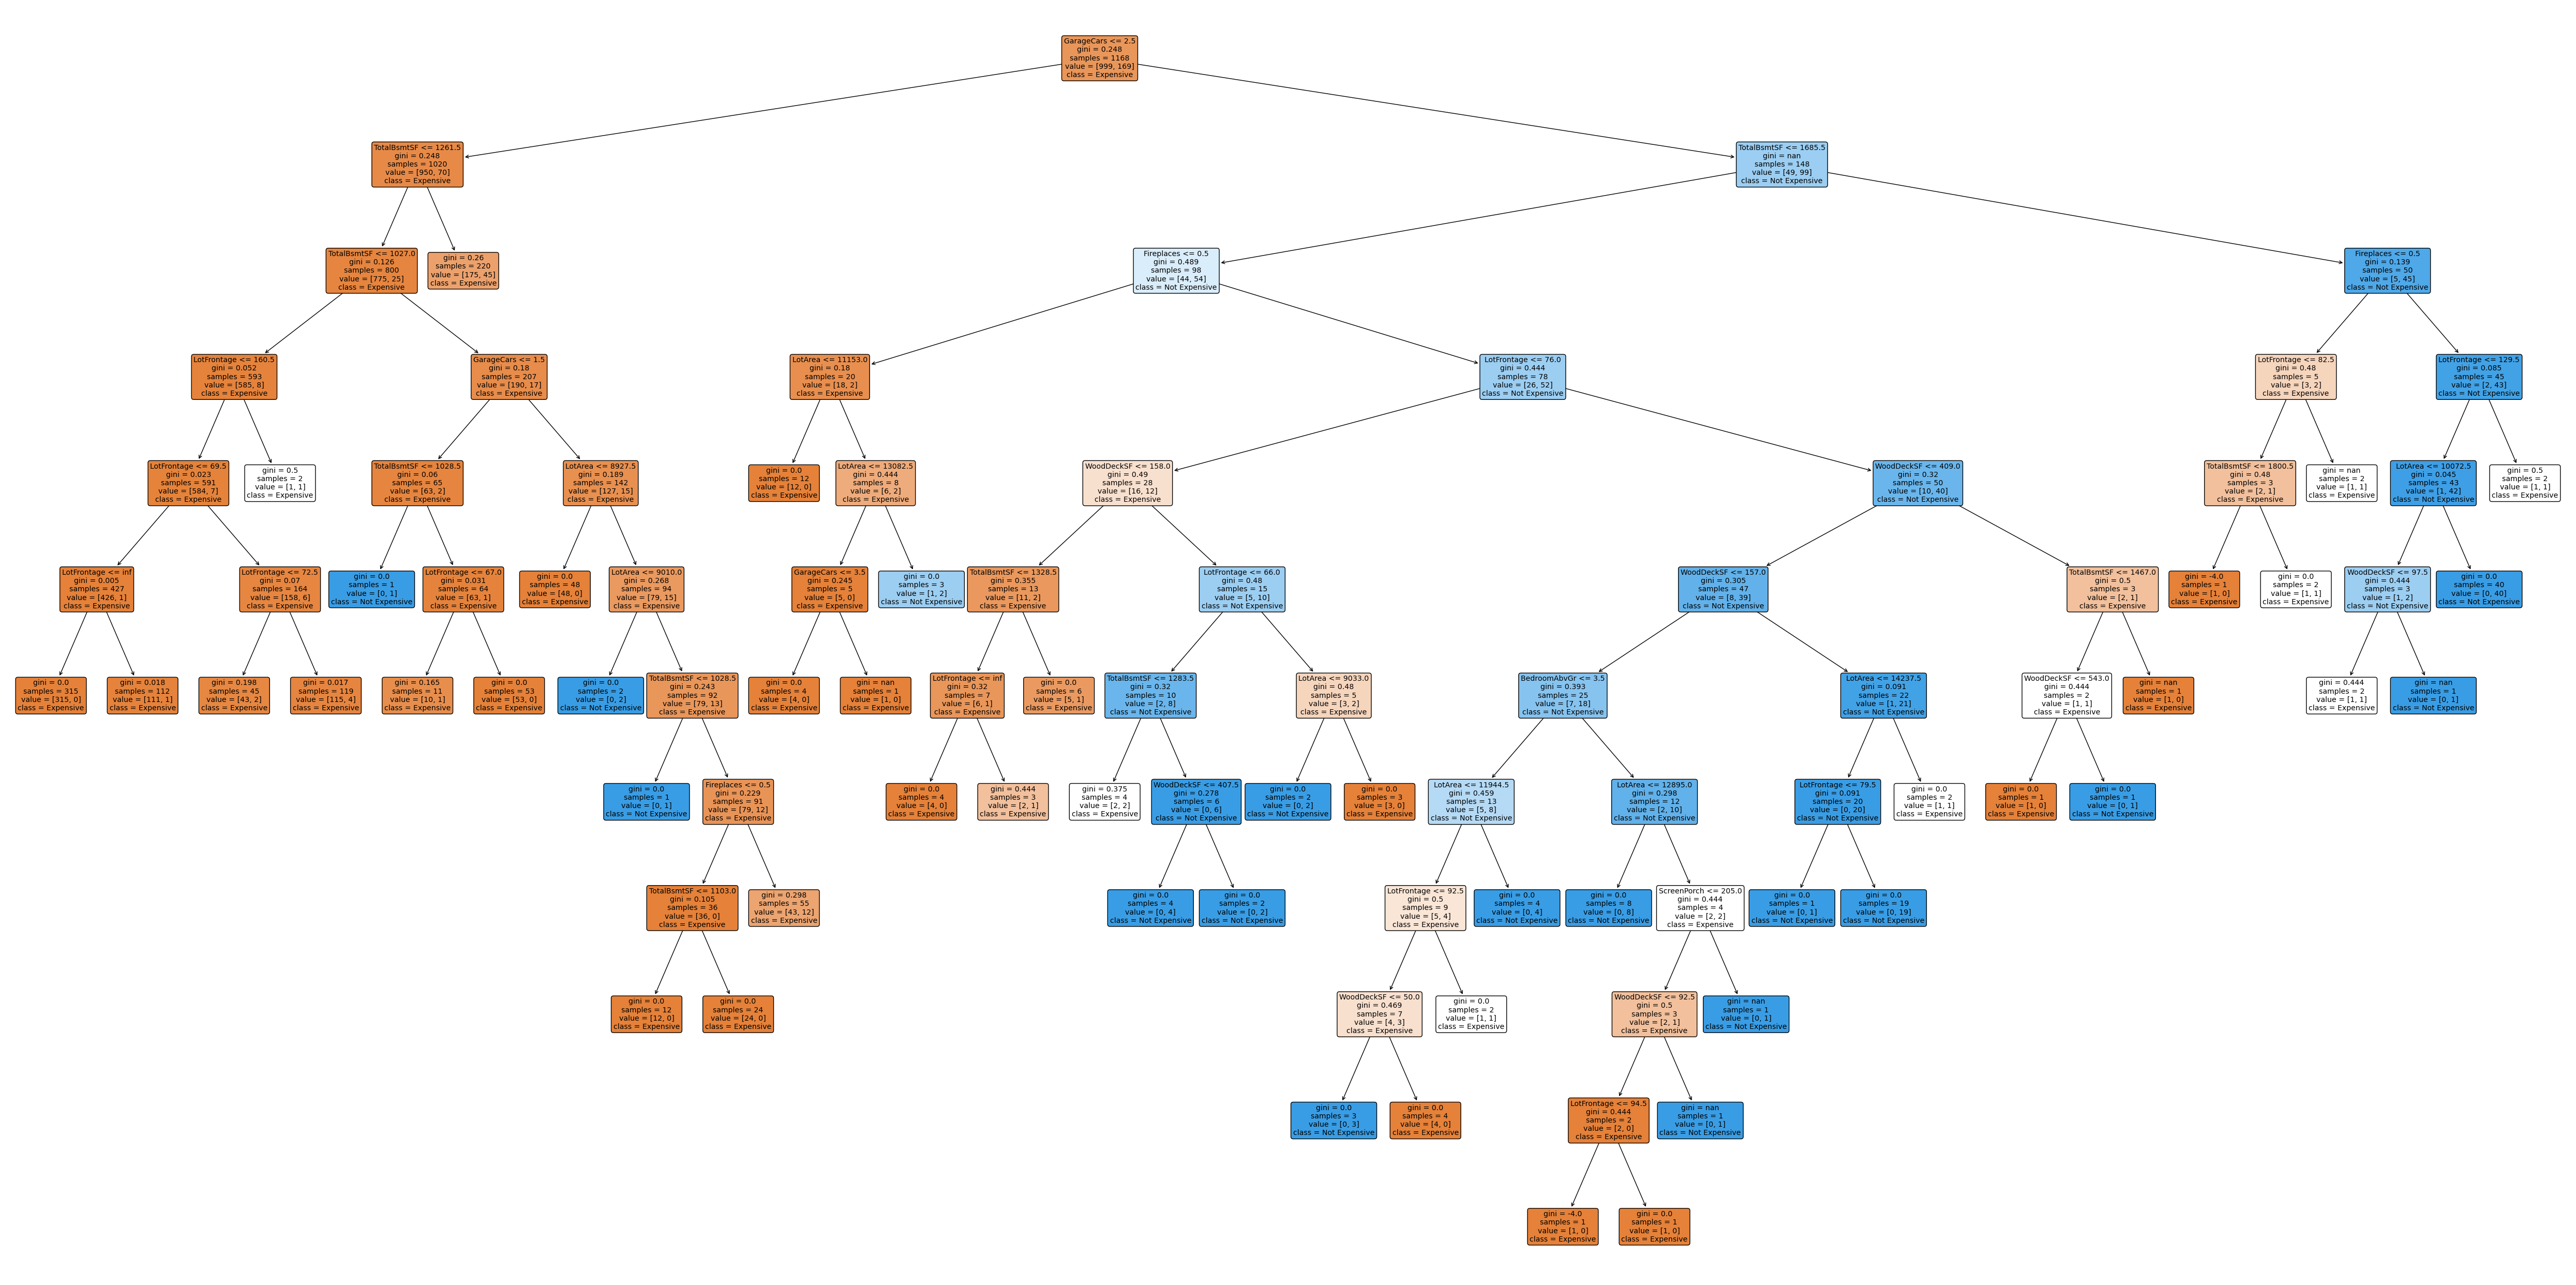

In [31]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
     my_tree,
     filled=True,
     rounded=True,
     class_names=['Expensive','Not Expensive'],
     feature_names=X.columns.to_list()
     );